### Import dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


### Data collection and processing

In [6]:
# Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("car data.csv")

# Inspecting the first five rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [8]:
# Get some info about the data set
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical data

In [14]:
# Encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding 'Seller_Type' column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data into features and target

In [17]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [18]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [19]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Splitting the data into training and test data sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

### Model training

### 1. Linear Regression

In [22]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Model evaluation

In [24]:
# predict on training data
training_data_pred = lin_reg_model.predict(X_train)

In [25]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_pred)

In [27]:
print('R squared error:', error_score)

R squared error: 0.8799451660493695


### Visualize the actual prices and predicted prices

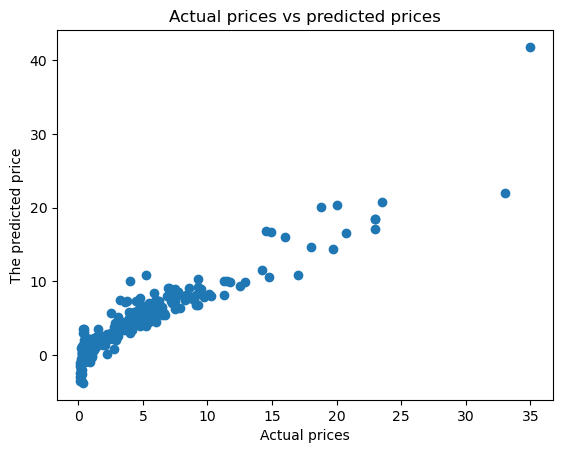

In [29]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('The predicted price')
plt.title('Actual prices vs predicted prices');

In [30]:
# predict on test data
test_data_pred = lin_reg_model.predict(X_test)

In [31]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_pred)

In [32]:
print('R squared error:', error_score)

R squared error: 0.8365766715026903


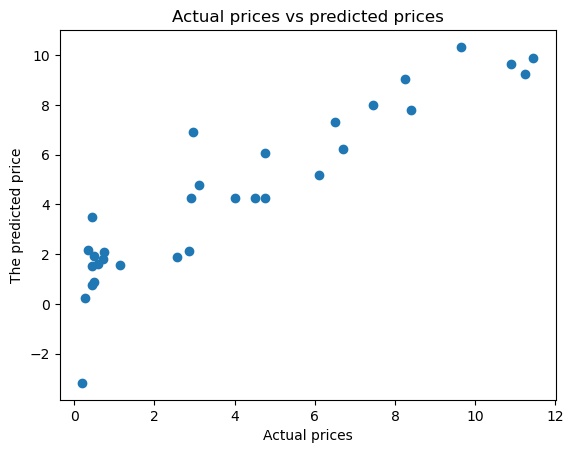

In [33]:
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('The predicted price')
plt.title('Actual prices vs predicted prices');

### 2. Lasso Regression

In [34]:
# Loading the Lasso regression model
lasso_reg_model = Lasso()

In [35]:
lasso_reg_model.fit(X_train, y_train)

Lasso()

In [36]:
# predict on training data
training_data_pred = lasso_reg_model.predict(X_train)

In [37]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_pred)

In [38]:
print('R squared error:', error_score)

R squared error: 0.8427856123435794


### Visualize the actual prices and predicted prices

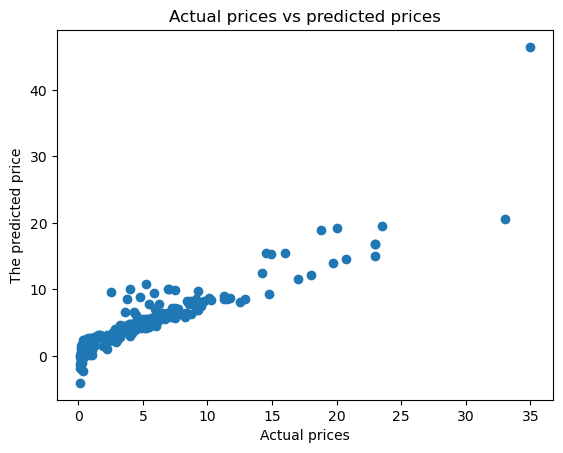

In [40]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('The predicted price')
plt.title('Actual prices vs predicted prices');

In [42]:
# predict on test data
test_data_pred = lasso_reg_model.predict(X_test)

In [43]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_pred)

In [44]:
print('R squared error:', error_score)

R squared error: 0.8709167941173195


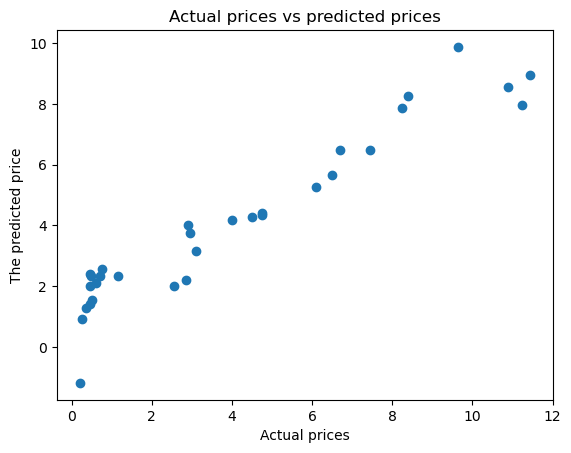

In [45]:
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('The predicted price')
plt.title('Actual prices vs predicted prices');